# PM2.5 concentration spatial distribution estimation in China 
## Abstract  

China, as the largest developing country in the world, has been facing increasingly severe air quality problems accompanying the continuous advancement of industrialization and urbanization. According to the “2017 China Environmental Situation Bulletin” released by the Ministry of Ecology and Environment, among the 338 cities at the prefecture level and above, 239 cities have exceeded the national ambient air quality standards, with a proportion of more than 70%. Air quality problems have seriously affected people's daily travel and physical health, restricted sustainable economic development, and become a hot issue for public and government attention. PM2.5 is a respirable particle with a diameter of no more than 2.5 micrometers in the aerodynamic field, and is one of the main indicators for evaluating air quality. Comprehensive understanding of the spatial distribution of PM2.5 concentration, representing the spatial process and environmental behavior of atmospheric pollution, is of great significance and guidance value for supporting atmospheric pollution monitoring and early warning, comprehensive treatment, protecting human health and social sustainable development. By the end of 2017, the China National Environmental Monitoring Center had established over 400 ground-level air quality monitoring stations, and released hourly air quality monitoring data including PM2.5, providing high-precision and reliable real-time monitoring results. However, due to the uneven spatial distribution and low coverage of ground monitoring stations, it is difficult for existing studies to effectively analyze and deeply mine the spatiotemporal data of their monitoring data. Unlike ground monitoring, remote sensing observation based on satellites can obtain high-coverage atmospheric environment spatial datasets, such as atmospheric aerosol optical depth (AOD). Numerous studies have shown that there is a strong correlation between AOD and PM2.5 concentration. Research on PM2.5 concentration Spatial regression relationships with factors such as AOD retrieved from remote sensing inversion can provide effective solutions for obtaining the spatial distribution of PM2.5 concentration in the entire study area. Methodology Based on GWR geographical weighted regression thinking, Wu SenSen combines OLR with neural network model to propose a Geographically Neural Network Weighted Regression (GNNWR) model. By utilizing the learning ability of neural networks, this model can handle the spatial heterogeneity and complex nonlinear characteristics of regression relationships, which has better fitness accuracy and prediction performance compared to models such as OLR and GWR. The purpose of this case is to establish a PM2.5 concentration spatial estimation model based on GNNWR to achieve accurate fitting of spatial heterogeneity and nonlinear characteristics in PM2.5 regression relationships, and then obtain high-precision and high-reasonability PM2.5 concentration spatial distribution in China.  

## Data description  

Many studies have shown that integrating meteorological conditions such as temperature, precipitation, wind speed, wind direction, and surface elevation factors can further improve the accuracy of PM2.5 spatial estimation. In this case, in addition to selecting AOD data as an auxiliary factor, temperature (TEMP), precipitation (TP), wind speed (WS), wind direction (WD), and surface elevation (DEM) factors are added as input variables for the model. The research time scale is the average of 2017 year scale:
(1) PM2.5 monitoring site data. The hourly PM2.5 concentration observation values from January 1, 2017 to December 31, 2017 were obtained from the China Environmental Monitoring Station. PM2.5 concentrations were measured using cone-shaped element oscillation trace or beta attenuation methods following national standard GB3095-2012. PM2.5 data were averaged for one year's time scale
(2) Aerosol data. Aerosol data are obtained from the LAADS website including both Terra and Aqua dark pixel inversion products with a resolution of 3 km (MOD04_3K and MYD04_3k), as well as deep blue algorithm inversion products with a resolution of 10 km (MOD04_L2 and MYD04_L2). In this article, the 3 km resolution AOD products are the main data source for PM2.5 estimation. When there is a missing value in the 3 km resolution data, a resolution-matching product will be used as much as possible using a 10 km resolution product for resampling substitution to ensure the reliability of AOD data.
(3) DEM data. DEM data are obtained from the ETO-PO1 global surface elevation model of NOAA with a resolution of 1 arc minute
(4) Meteorological data including temperature, precipitation, wind speed, and wind direction are obtained from the ERA5 global climate reanalysis modele provided by ECMWF with hourly gridded data at a resolution of 0.5 degrees.   

## Model Introduction  

Based on the geographical weighted idea similar to GWR, the GNNWR model believes that the spatial heterogeneity of the regression relationship can be regarded as the varying levels of spatial nonstationarity at different locations that affect the "OLR regression relationship". Therefore, in the spatial estimation experiment of PM2.5 concentration in this case, the model structure of GNNWR is defined as follows:  
 
![Image Name](https://mydde.deep-time.org/s3/static-files/upload/upload/1694059648746_1.png)  

In this equation, (u_i, v_i) are the spatial coordinates of the i-th sample point, and β = (β_0, β_1, ..., β_6) are the regression coefficients of the OLR model, reflecting the average level of the PM2.5 regression relationship for the entire region. The estimation matrix of OLR coefficients is represented as follows:

![Image Name](https://mydde.deep-time.org/s3/static-files/upload/upload/1694059665465_2.png)  

of which: 

![Image Name](https://mydde.deep-time.org/s3/static-files/upload/upload/1694059673642_3.png)  


<br/><br/>  


![Image Name](https://mydde.deep-time.org/s3/static-files/upload/upload/1694003342595_1.png)  
The spatial estimation model for PM2.5 concentration based on GNNWR

## Main Content  
1. Model Training 
2. Result Storage, Loading, and Visualization
3. Estimation 

# Part A：Preparation

## Import Necessary Packages

In [3]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from src.gnnwr import models,datasets,utils
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap, MarkerCluster
from demo_utils import marker_map,Heatmap
import torch.nn as nn
from sklearn.metrics import r2_score as r2
import matplotlib.pyplot as plt

# Part B：Model Training

## Step 1：Import Training Data

In [4]:
data = pd.read_csv(u'../data/pm25_data.csv')
data.head(5)

监测点编码 监测点名称  城市       经度       纬度      date      PM2_5  row_index  \
0  1001A  万寿西宫  北京  116.366  39.8673  20170601  54.733894       2201   
1  1002A    定陵  北京  116.170  40.2865  20170601  48.080737       2134   
2  1003A    东四  北京  116.434  39.9522  20170601  54.898592       2188   
3  1004A    天坛  北京  116.434  39.8745  20170601  52.266382       2200   
4  1005A   农展馆  北京  116.473  39.9716  20170601  53.189076       2185   

   col_index       proj_x  ...         t2m            sp        tp  \
0       6867  1650847.552  ...  284.561066  100809.27340  0.001006   
1       6835  1625003.973  ...  282.907684   97125.08594  0.001044   
2       6877  1653776.710  ...  284.492249  100830.96880  0.001002   
3       6877  1655828.045  ...  284.636200  100936.80470  0.001010   
4       6884  1656224.681  ...  284.506561  100880.17970  0.001019   

          blh         e          r       u10       v10   aod_sat  ndvi  
0  134.995636 -0.000007  46.315975  0.425366  0.170262  0.870967  2401  
1  157.775970 -0.000006  53.605503  0.211734 -0.676848  0.712080  5255  
2  129.971298 -0.000007  45.537464  0.266666  0.069172  0.875811  2609  
3  138.793961 -0.000007  45.387913  0.299403  0.227950  0.869679  2420  
4  130.520599 -0.000007  44.790119  0.169121  0.079546  0.873232  3296  

[5 rows x 24 columns]

### View the distribution of training data

## Step 2：Partition Datasets

In [5]:
train_dataset, val_dataset, test_dataset = datasets.init_dataset(data=data,
                                                        test_ratio=0.15,
                                                        valid_ratio=0.15,
                                                        x_column=['dem', 'w10','d10','t2m','aod_sat','tp'],
                                                        y_column=['PM2_5'],
                                                        spatial_column=['经度','纬度'],
                                                        sample_seed=23,
                                                        batch_size=64)

x_min:[-5.0000000e+00  4.1591436e-02  3.9565850e-02  2.6959613e+02
  5.6254357e-02  3.8816700e-05];  x_max:[4.52000000e+03 3.20341086e+00 3.59605225e+02 2.97242950e+02
 1.06999075e+00 4.07377200e-03]
y_min:[3.85633803];  y_max:[133.8005618]


## Step 3：Initialize GNNWR Model

In [6]:
gnnwr = models.GNNWR(train_dataset = train_dataset,
                     valid_dataset = val_dataset, 
                     test_dataset = test_dataset,
                     dense_layers = [512, 256, 128],
                     start_lr = 0.2,
                     optimizer = "Adadelta",
                     activate_func = nn.PReLU(init=0.1),
                     model_name = "GNNWR_PM25",
                     model_save_path = "./demo_result/gnnwr_models",
                     log_path = "./demo_result/gnnwr_logs",
                     write_path = "./demo_result/gnnwr_runs"
                     )

In [ ]:
gnnwr.run(max_epoch = 200,print_frequency = 100)

In [7]:
gnnwr.load_model('./demo_result/gnnwr_models/GNNWR_PM25.pkl')

## Step 4：Model Training

In [6]:
# gnnwr.run(max_epoch = 200,print_frequency = 100)

## Step 5：模型评价与结果分析

### 输出模型训练结果

In [8]:
gnnwr.result()

--------------------Result Table--------------------

Model Name:           | GNNWR_PM25
Model Structure:      |
 SWNN(
  (activate_func): PReLU(num_parameters=1)
  (fc): Sequential(
    (swnn_full0): Linear(in_features=1017, out_features=32, bias=True)
    (swnn_batc0): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (swnn_acti0): PReLU(num_parameters=1)
    (swnn_drop0): Dropout(p=0.2, inplace=False)
    (swnn_full1): Linear(in_features=32, out_features=16, bias=True)
    (swnn_batc1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (swnn_acti1): PReLU(num_parameters=1)
    (swnn_drop1): Dropout(p=0.2, inplace=False)
    (full2): Linear(in_features=16, out_features=7, bias=True)
  )
)
Optimizer:            |
 Adadelta (
Parameter Group 0
    eps: 1e-06
    foreach: None
    initial_lr: 0.2
    lr: 0.2
    maximize: False
    rho: 0.9
    weight_decay: 0
)
independent variable: | ['dem', 'w10', 'd10', 't2m', 'aod_

### Save the training result

In [8]:
gnnwr.reg_result('./demo_result/GNNWR_PM25_Result.csv')

weight_dem  weight_w10  weight_d10  weight_t2m  weight_aod_sat  \
0       1.527390    3.916638    0.051244   -3.198060       54.474169   
1      -5.002254   19.963998    0.149501   44.642430      -10.314121   
2       0.828569   11.467724    0.132944    9.494517       35.756017   
3      -0.036246    5.801823   -0.014378   -4.465436       47.946405   
4       1.589376    0.765837   -0.150497    8.546681       88.693341   
...          ...         ...         ...         ...             ...   
1403    0.230816    1.283713    0.018162    8.209377       38.829305   
1404    1.700044    0.820514   -0.142262    9.663389       89.305347   
1405    0.506832    6.951550    0.082750    1.324135       54.779660   
1406    1.657014    1.121715    0.029528   10.071182       41.533376   
1407   -1.057550    2.225066   -0.013547   -1.085721       33.649910   

      weight_tp       bias  Pred_PM2_5    id  
0     -7.879818  14.744729   48.368582   618  
1     28.282281   7.979057   25.281386   905  
2     18.492169  -0.656410   26.894712   814  
3     -6.502894  23.921206   58.971237   544  
4    -26.985669  16.399914   52.799046    74  
...         ...        ...         ...   ...  
1403   3.928498   4.785633   35.435032   297  
1404 -26.250936  14.844604   48.346941    68  
1405   1.779616   7.114976   54.036008    15  
1406  -0.656012   3.416267   27.762459   537  
1407  -0.508894  20.006750   43.260931  1126  

[1408 rows x 9 columns]

# Part C：Visualization

In [9]:
visualizer = utils.Visualize(data=gnnwr,lon_lat_columns=['经度','纬度'])

### Drawing the distribution of datasets

### Universal

In [10]:
visualizer.display_dataset(name='all',y_column='PM2_5')

### Train

In [11]:
visualizer.display_dataset(name='train',y_column='PM2_5')

### Validation

In [12]:
visualizer.display_dataset(name='valid',y_column='PM2_5')

### Test

In [13]:
visualizer.display_dataset(name='test',y_column='PM2_5')

### Drawing the heat map for the distribution of weights of each variables 

#### DEM

In [14]:
visualizer.weights_heatmap('weight_dem')


TypeError: 'NoneType' object is not subscriptable

#### AOD

In [ ]:
visualizer.weights_heatmap('weight_aod_sat')

### Precipitation

In [ ]:
visualizer.weights_heatmap('weight_tp')

#### Temperature

In [ ]:
visualizer.weights_heatmap('weight_t2m')

#### Wind Speed

In [ ]:
visualizer.weights_heatmap('weight_w10')

#### Wind Direction

In [ ]:
visualizer.weights_heatmap('weight_d10')

#### Bias

In [ ]:
visualizer.weights_heatmap('bias')

# Part D：Saving and Loading

## Step 1：Saving Datasets

In [ ]:
# make sure dir is not exist
train_dataset.save('./demo_result/gnnwr_datasets/train_dataset')
val_dataset.save('./demo_result/gnnwr_datasets/val_dataset')
test_dataset.save('./demo_result/gnnwr_datasets/test_dataset')

ValueError: dir is already exists

## Step 2：Loading Datasets

In [ ]:
train_dataset_load = datasets.load_dataset('./demo_result/gnnwr_datasets/train_dataset/')
val_dataset_load = datasets.load_dataset('./demo_result/gnnwr_datasets/val_dataset/')
test_dataset_load = datasets.load_dataset('./demo_result/gnnwr_datasets/test_dataset/')

## Step 3：Loading Model

### Initialize GNNWR Model

In [ ]:
gnnwr_load = models.GNNWR(train_dataset = train_dataset_load,
                     valid_dataset = val_dataset_load, 
                     test_dataset = test_dataset_load,
                     dense_layers = [512, 256, 128],
                     start_lr = 0.2,
                     optimizer = "Adadelta",
                     activate_func = nn.PReLU(init=0.1),
                     model_name = "GNNWR_PM25",
                     model_save_path = "./demo_result/gnnwr_models",
                     log_path = "./demo_result/gnnwr_logs",
                     write_path = "./demo_result/gnnwr_runs"
                     )

### Loading Parameters

In [ ]:
gnnwr_load.load_model('./demo_result/gnnwr_models/GNNWR_PM25.pkl')
gnnwr_load.result()

Test Loss:  77.66085508135734  Test R2:  0.6408304559936908
--------------------Result Table--------------------

Model Name:           | GNNWR_PM25
Model Structure:      |
 SWNN(
  (activate_func): PReLU(num_parameters=1)
  (fc): Sequential(
    (swnn_full0): Linear(in_features=1017, out_features=32, bias=True)
    (swnn_batc0): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (swnn_acti0): PReLU(num_parameters=1)
    (swnn_drop0): Dropout(p=0.2, inplace=False)
    (swnn_full1): Linear(in_features=32, out_features=16, bias=True)
    (swnn_batc1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (swnn_acti1): PReLU(num_parameters=1)
    (swnn_drop1): Dropout(p=0.2, inplace=False)
    (full2): Linear(in_features=16, out_features=7, bias=True)
  )
)
Optimizer:            |
 Adadelta (
Parameter Group 0
    eps: 1e-06
    foreach: None
    initial_lr: 0.2
    lr: 0.2
    maximize: False
    rho: 0.9
    weight_decay: 0


# Part E：Estimation

## Step 1：Import Estimation Data

In [ ]:
pred_data = pd.read_csv(u'../data/pm25_predict_data.csv')

## Step 2：Initialize Estimation Dataset

In [ ]:
pred_dataset = datasets.init_predict_dataset(data = pred_data,train_dataset = train_dataset,x_column=['dem', 'w10','d10','t2m','aod_sat','tp'],spatial_column=['经度','纬度'])

## Step 3：Estimate

In [ ]:
res = gnnwr.predict(pred_dataset)
res.head(5)

监测点编码 监测点名称  城市       经度       纬度      date      PM2.5  row_index  \
0  1001A  万寿西宫  北京  116.366  39.8673  20170930  56.357143     2201.0   
1  1002A    定陵  北京  116.170  40.2865  20170930  47.148148     2134.0   
2  1003A    东四  北京  116.434  39.9522  20170930  53.857143     2188.0   
3  1004A    天坛  北京  116.434  39.8745  20170930  46.333333     2200.0   
4  1005A   农展馆  北京  116.473  39.9716  20170930  52.203704     2185.0   

   col_index        proj_x  ...             sp        tp        blh         e  \
0     6867.0  1.650848e+06  ...  100287.671875  0.000051  64.583054 -0.000007   
1     6835.0  1.625004e+06  ...   96752.507812  0.000304  40.621140 -0.000007   
2     6877.0  1.653777e+06  ...  100307.703125  0.000058  60.242908 -0.000007   
3     6877.0  1.655828e+06  ...  100410.367188  0.000047  69.535637 -0.000008   
4     6884.0  1.656225e+06  ...  100355.054688  0.000059  62.281456 -0.000007   

           r       u10       v10   aod_sat  ndvi  pred_result  
0  52.682091  0.384257  0.784808  0.762762  3443    48.662245  
1  62.529091 -0.156175 -0.537717  0.574785  7810    38.058659  
2  52.126640  0.093867  0.617515  0.796827  3328    49.482246  
3  51.301529  0.197439  0.893495  0.758839  4535    48.455699  
4  51.071964 -0.060543  0.634863  0.760148  3901    47.584038  

[5 rows x 25 columns]

## Step 4：Display

In [ ]:
visualizer.dot_map(data=res,lon_column='经度',lat_column='纬度',y_column='pred_result',colors=['blue','green','red'])

In [ ]:
pred_res = res

In [ ]:
(z=='').sum()

0

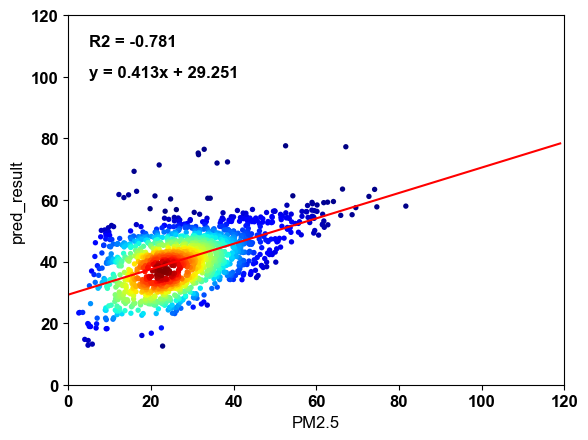

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interpn
import sklearn.metrics as metrics
y_true = pred_res['PM2.5'].values
y_pred = pred_res['pred_result'].values

# 计算两个数据的线性回归并绘制直线
linear_model = np.polyfit(y_true,y_pred,1)
linear_model_fn = np.poly1d(linear_model)
x_s = np.arange(0,120)

H,x_e,y_e = np.histogram2d(y_true,y_pred,bins=10)
z = interpn((x_e[:-1],y_e[:-1]),H,np.vstack([y_true,y_pred]).T,method='splinef2d',bounds_error=False)
idx = z.argsort()
x,y,z = y_true[idx],y_pred[idx],z[idx]
# 设置每圈范围
plt.scatter(x,y,c=z,cmap='jet',edgecolors='none',s=15)
plt.plot(x_s,linear_model_fn(x_s),color='red')
plt.xlim(0,120)
plt.ylim(0,120)
plt.xlabel("PM2.5")
plt.ylabel("pred_result")
# R2
# 设置字体,加粗,字号
plt.rcParams['font.sans-serif']=['arial']
plt.rcParams['font.weight']='bold'
plt.rcParams['font.size']=12
plt.rcParams['axes.unicode_minus']=False
plt.text(5,110,'R2 = %.3f' % metrics.r2_score(y_true,y_pred))
# 撰写方程
plt.text(5,100,'y = %.3fx + %.3f' % (linear_model[0],linear_model[1]))
plt.show()

In [ ]:
z

array([-1.42892074, -1.05682703, -0.71298365, ...,         nan,
               nan,         nan])